#### 📚 Importando as bibliotecas necessárias

In [ ]:
import pandas as pd
import random
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from pylab import rcParams

!pip install --upgrade geopandas
import geopandas as gpd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 21.5 MB/s 
     |████████████████████████████████| 6.3 MB 63.6 MB/s 
     |████████████████████████████████| 16.7 MB 63.1 MB/s 


#### 🔁 Conectando o Google Colab ao Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### 🎲 Importando os dados

Apesar de termos todo o dataset disponível para realizar as análises, iremos trabalhar com o conceito de **amostragem** e construir nossa EDA apenas com um pequeno grupo desse conjunto de dados.

1. Utilizamos o encoding ISO-8859-1 para processar todos os caracteres do arquivo
2. Separamos uma amostra aleatória de 1% dos dados disponíveis

In [ ]:
df = pd.read_csv(
    '/content/drive/MyDrive/Projeto EST/microdados_enem_2021/MICRODADOS_ENEM_2021.csv',
    header=0,
    encoding = "ISO-8859-1",
    skiprows=lambda i: i > 0 and random.random() > 0.01,
    sep=';'
)

#### 👀 Dando uma olhada na estrutura geral dos dados

In [ ]:
df.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210051456791,2021,11,F,1,1,1,1,9,1,...,B,A,A,B,A,A,E,A,B,B
1,210053072889,2021,6,F,1,3,1,1,0,1,...,A,A,A,B,A,A,C,A,A,B
2,210051858401,2021,4,F,1,2,1,2,0,2,...,A,A,A,B,A,A,A,A,A,B
3,210052300329,2021,11,F,0,3,1,1,0,1,...,B,A,A,B,A,A,C,A,A,B
4,210051177310,2021,13,F,0,3,1,1,0,1,...,A,A,A,B,A,A,E,A,A,B


#### 📝 Separando a coluna das notas

In [ ]:
grades = ['NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
df[grades].head()

,NU_NOTA_LC,NU_NOTA_CH,NU_NOTA_CN,NU_NOTA_MT,NU_NOTA_REDACAO
0,581.7,588.8,644.7,623.3,880.0
1,416.2,542.6,425.7,453.1,340.0
2,530.6,603.5,541.7,659.8,880.0
3,450.7,472.4,539.1,375.4,440.0
4,501.9,553.3,518.5,467.0,520.0


#### ❌ Retirando os valores nulos

In [ ]:
df[grades].isnull().sum()

NU_NOTA_LC         10031
NU_NOTA_CH         10031
NU_NOTA_CN         11379
NU_NOTA_MT         11379
NU_NOTA_REDACAO    10031
dtype: int64

In [ ]:
df.dropna(inplace=True)

#### 📊 Calculando a média geral de cada candidato

In [ ]:
df['NU_NOTA_GERAL'] = df[grades].sum(axis=1) / 5

grades = ['NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'NU_NOTA_GERAL']

pd.DataFrame(df['NU_NOTA_GERAL'].head(10))

,NU_NOTA_GERAL
2,643.12
11,524.36
14,520.08
20,525.66
31,602.48
36,673.40
45,658.38
56,452.48
64,739.58
68,626.68


In [ ]:
rcParams['figure.figsize'] = 10, 5

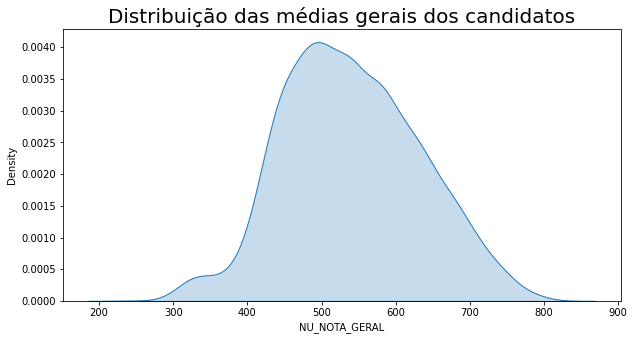

In [ ]:
sns.kdeplot(data=df['NU_NOTA_GERAL'], fill=True, palette="Blues")

plt.title('Distribuição das médias gerais dos candidatos', fontsize=20)
plt.show()

#### 📏 Distribuição das notas de cada área do conhecimento

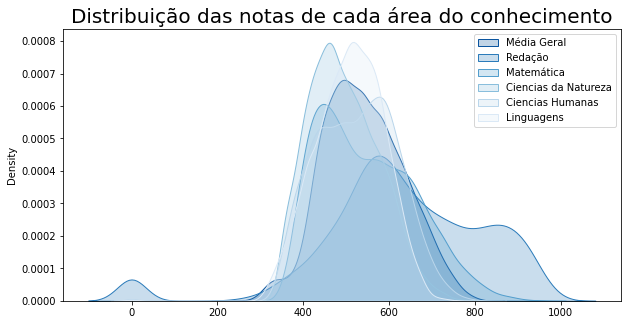

In [ ]:
sns.kdeplot(data=df[grades], fill=True, palette="Blues")

plt.legend(['Média Geral', 'Redação', 'Matemática', 'Ciencias da Natureza', 'Ciencias Humanas', 'Linguagens'], fontsize=10)
plt.title('Distribuição das notas de cada área do conhecimento', fontsize=20)
plt.show()

#### ⚖ Comparando as notas de cada área com a média geral

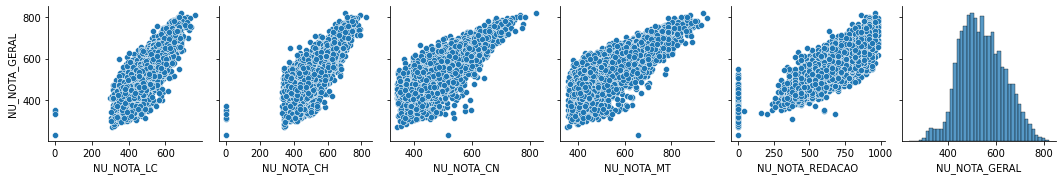

In [ ]:
sns.pairplot(df[grades], y_vars='NU_NOTA_GERAL', palette='Blues')
plt.show()

#### ⚖ Comparando o desempenho de cada área com a média geral

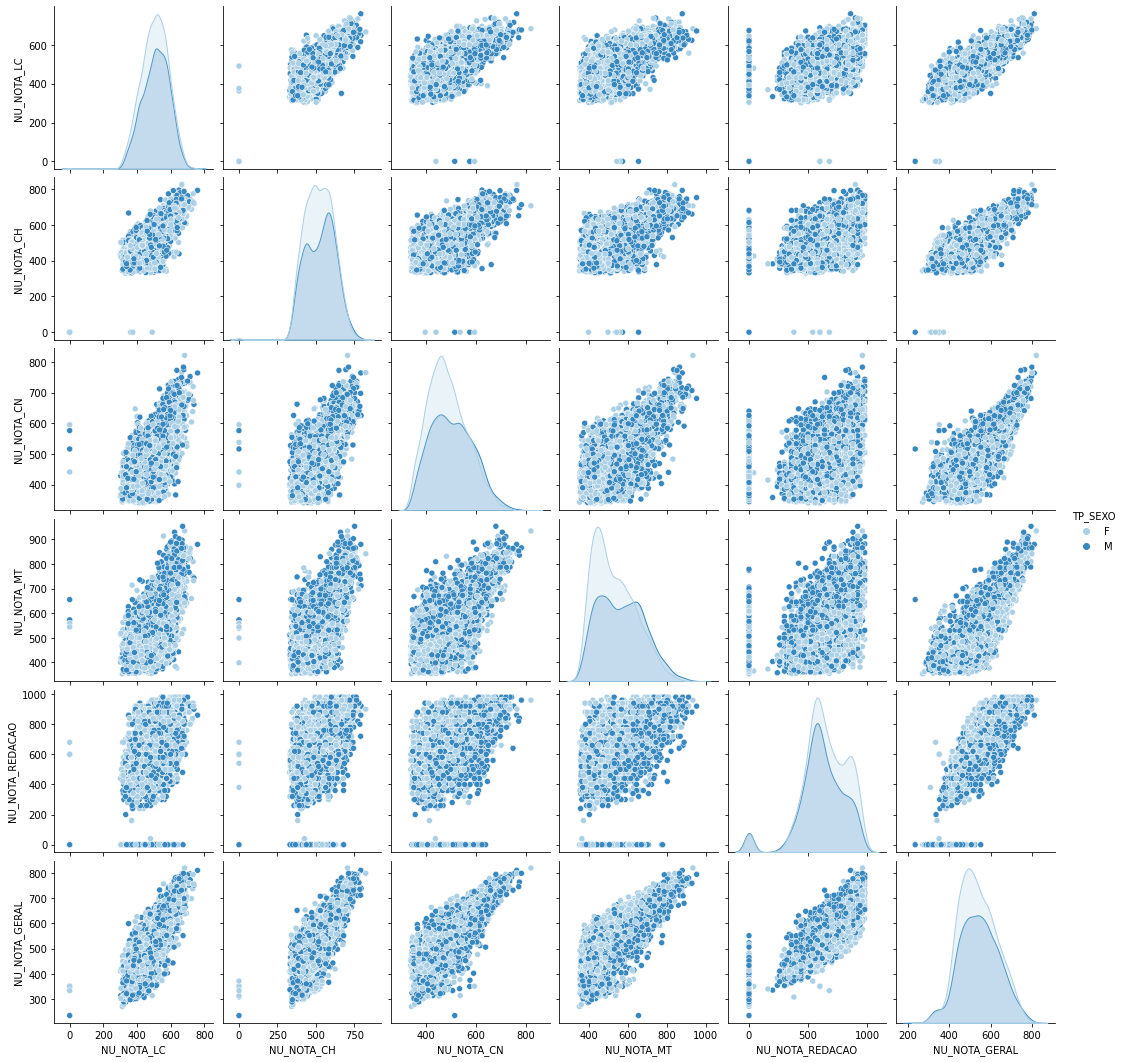

In [ ]:
grades = ['NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'NU_NOTA_GERAL', 'TP_SEXO']
sns.pairplot(df[grades], hue='TP_SEXO', palette='Blues')

plt.show()

#### 👫 Média do desempenho por gênero

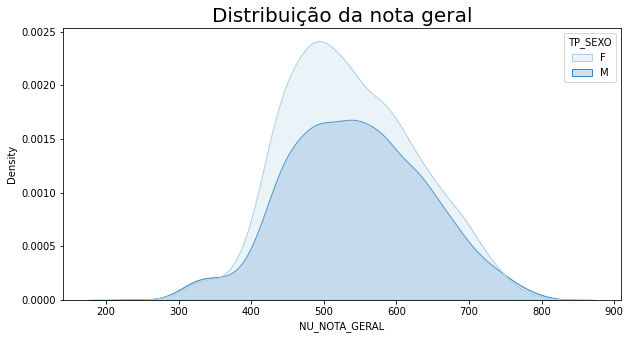

In [ ]:
mean_vs_gender = ['NU_NOTA_GERAL', 'TP_SEXO']
sns.kdeplot(data=df[mean_vs_gender], x='NU_NOTA_GERAL', fill=True, hue='TP_SEXO', palette="Blues")
plt.title('Distribuição da nota geral', fontsize=20)
plt.show()

In [ ]:
means = df.groupby(['TP_SEXO'])[['NU_NOTA_GERAL']].mean()
means

,NU_NOTA_GERAL
TP_SEXO,
F,537.180346
M,544.433636


#### 📝 Média do desempenho por gênero na prova de matemática

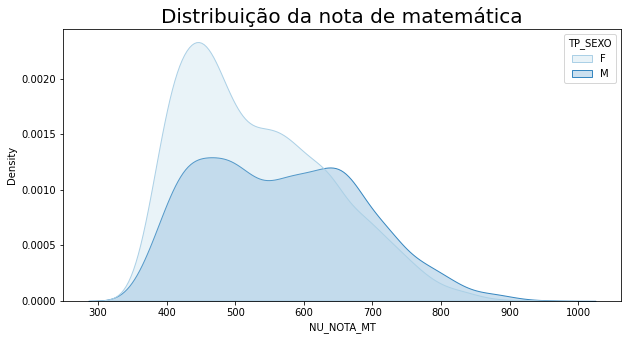

In [ ]:
mean_vs_gender = ['NU_NOTA_MT', 'TP_SEXO']
sns.kdeplot(data=df[mean_vs_gender], x='NU_NOTA_MT', fill=True, hue='TP_SEXO', palette="Blues")
plt.title('Distribuição da nota de matemática', fontsize=20)
plt.show()

#### 👓 Verificando correlação entre o desempenho nas áreas

A função .corr(), no modo padrão, calcula a correlação através do método Pearson. O coeficiente de Pearson varia de 1 a -1. Sendo:

1: correlação perfeita e positiva entre as variáveis

0: não existe correlação linear entre as variáveis

-1: correlação perfeita e negativa entre as variáveis

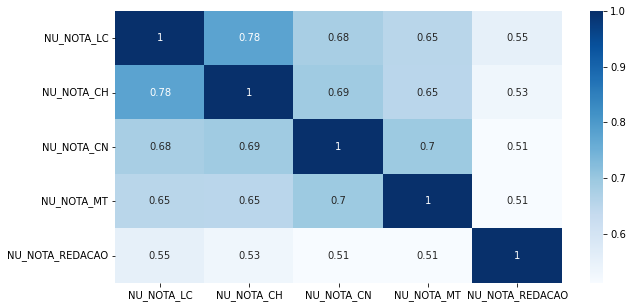

In [ ]:
correlation_df = df[['NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].corr()
sns.heatmap(correlation_df, annot=True, cmap="Blues")
plt.show()

#### 👓 Verificando a correlação entre o fator socioeconômico e a nota em matemática

In [ ]:
def subgrupos_q006(x):
    if x =='A':
        return 0
    if x in 'BCDE':
        return 1
    if x in 'FGHI': 
        return 2
    if x in 'JKLM': 
        return 3
    if x in 'NOPQ': 
        return 4

In [ ]:
def numericParsing(x):
    if x =='A':
        return 0
    if x == 'B':
        return 1
    if x == 'C': 
        return 2
    if x == 'D': 
        return 3
    if x == 'E': 
        return 4
    if x == 'F': 
        return 5
    if x == 'G': 
        return 6
    if x == 'H': 
        return 0

In [ ]:
df['Q001'] = df['Q001'].apply(numericParsing)
df['Q002'] = df['Q002'].apply(numericParsing)
df['SUBGRUPOS_Q006'] = df['Q006'].apply(subgrupos_q006)
df['Q022'] = df['Q022'].apply(numericParsing)
df['Q024'] = df['Q024'].apply(numericParsing)
df['Q025'] = df['Q025'].apply(numericParsing)

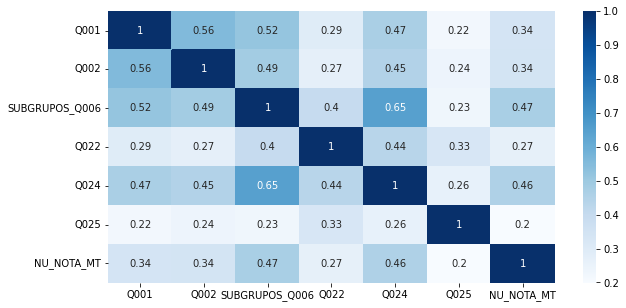

In [ ]:
correlation_df = df[['Q001','Q002','SUBGRUPOS_Q006','Q022','Q024','Q025','NU_NOTA_MT']].corr()
sns.heatmap(correlation_df, annot=True, cmap="Blues")
plt.show()

#### ✏️  Média do desempenho com base nos fatores socioeconômicos

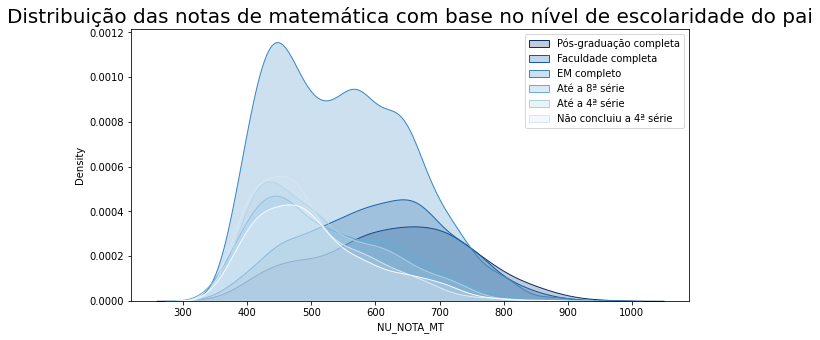

In [ ]:
mean_vs_q001 = ['NU_NOTA_MT', 'Q001']
sns.kdeplot(data=df[mean_vs_q001], x='NU_NOTA_MT', fill=True, hue='Q001', palette="Blues")

plt.legend(['Pós-graduação completa', 'Faculdade completa', 'EM completo', 'Até a 8ª série', 'Até a 4ª série', 'Não concluiu a 4ª série'], fontsize=10)
plt.title('Distribuição das notas de matemática com base no nível de escolaridade do pai', fontsize=20)
plt.show()

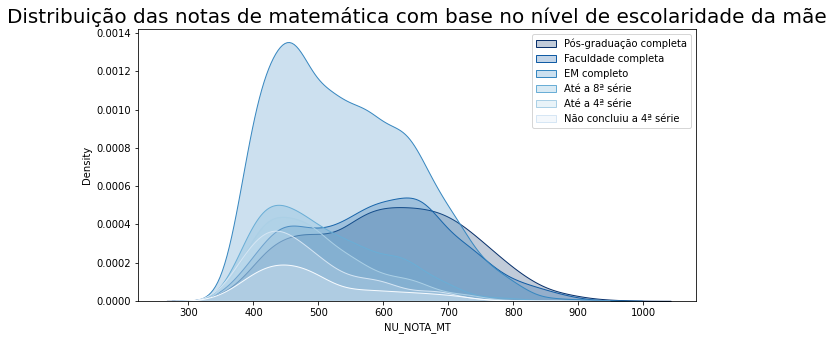

In [ ]:
mean_vs_q002 = ['NU_NOTA_MT', 'Q002']
sns.kdeplot(data=df[mean_vs_q002], x='NU_NOTA_MT', fill=True, hue='Q002', palette="Blues")

plt.legend(['Pós-graduação completa', 'Faculdade completa', 'EM completo', 'Até a 8ª série', 'Até a 4ª série', 'Não concluiu a 4ª série'], fontsize=10)
plt.title('Distribuição das notas de matemática com base no nível de escolaridade da mãe', fontsize=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


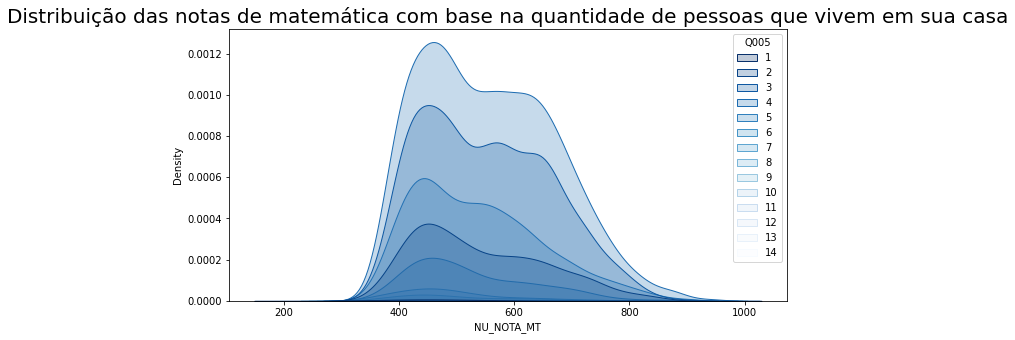

In [ ]:
mean_vs_q005 = ['NU_NOTA_MT', 'Q005']
sns.kdeplot(data=df[mean_vs_q005], x='NU_NOTA_MT', fill=True, hue='Q005', palette="Blues_r")
plt.title('Distribuição das notas de matemática com base na quantidade de pessoas que vivem em sua casa', fontsize=20)
plt.show()

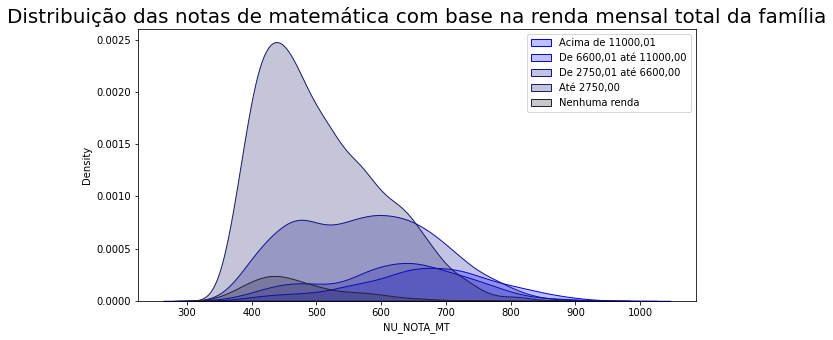

In [ ]:
mean_vs_q006 = ['NU_NOTA_MT', 'SUBGRUPOS_Q006']
sns.kdeplot(data=df[mean_vs_q006], x='NU_NOTA_MT', fill=True, hue='SUBGRUPOS_Q006', palette="dark:b")

legends = ['Nenhuma renda', 'Até 2750,00', 'De 2750,01 até 6600,00', 'De 6600,01 até 11000,00', 'Acima de 11000,01']
legends.reverse()
plt.legend(legends, fontsize=10)
plt.title('Distribuição das notas de matemática com base na renda mensal total da família', fontsize=20)
plt.show()

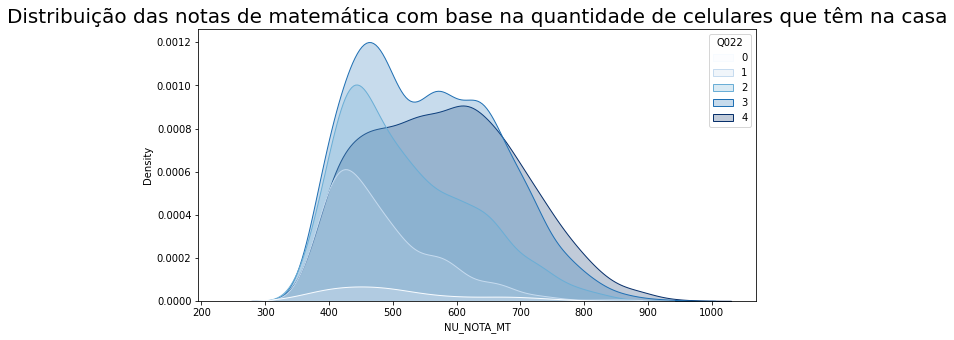

In [ ]:
mean_vs_q022 = ['NU_NOTA_MT', 'Q022']
sns.kdeplot(data=df[mean_vs_q022], x='NU_NOTA_MT', fill=True, hue='Q022', palette="Blues")
plt.title('Distribuição das notas de matemática com base na quantidade de celulares que têm na casa', fontsize=20)
plt.show()

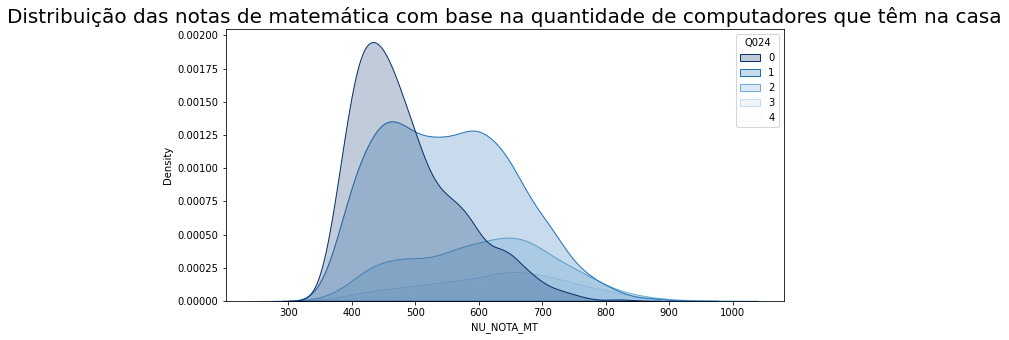

In [ ]:
mean_vs_q024 = ['NU_NOTA_MT', 'Q024']
sns.kdeplot(data=df[mean_vs_q024], x='NU_NOTA_MT', fill=True, hue='Q024', palette="Blues_r")
plt.title('Distribuição das notas de matemática com base na quantidade de computadores que têm na casa', fontsize=20)
plt.show()

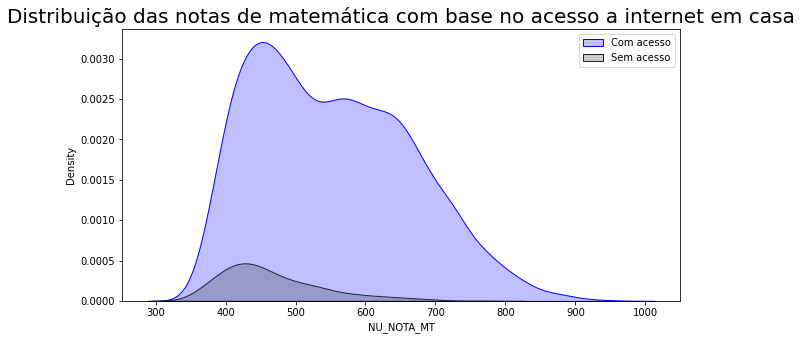

In [ ]:
mean_vs_q025 = ['NU_NOTA_MT', 'Q025']
sns.kdeplot(data=df[mean_vs_q025], x='NU_NOTA_MT', fill=True, hue='Q025', palette="dark:b")

plt.legend(['Com acesso', 'Sem acesso'], fontsize=10)
plt.title('Distribuição das notas de matemática com base no acesso a internet em casa', fontsize=20)
plt.show()

#### 👓 Verificando a correlação entre alguns dados do participante e a nota em matemática

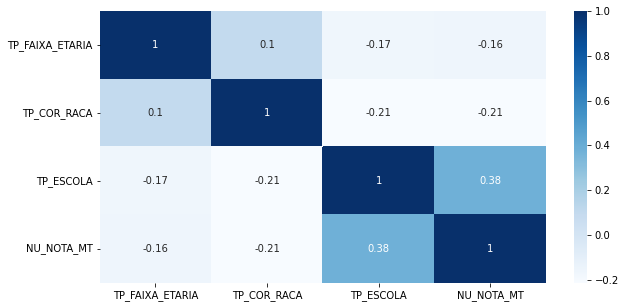

In [ ]:
correlation_df = df[[ 'TP_FAIXA_ETARIA','TP_COR_RACA','TP_ESCOLA','NU_NOTA_MT']].corr()
sns.heatmap(correlation_df, annot=True, cmap="Blues")
plt.show()

#### ✏️  Média do desempenho com base nos dados do participante

In [ ]:
def subgrupos_faixa_etaria(x):
  if x == 1: # menor de 17
    return 0
  if x > 1 and x < 4: # 17 e 18
    return 1
  if x > 3 and x < 6: # 19 e 20
    return 2
  if x > 5 and x < 8: # 21 e 22
    return 3
  if x > 7 and x < 10:  # 23 e 24
    return 4
  if x > 9 and x < 14: # 25 a 40
    return 5
  if x > 13 and x < 18: # 41 a 60
    return 6
  if x > 17: # maior de 60
    return 7

In [ ]:
df['subgrupos_faixa_etaria'] = df['TP_FAIXA_ETARIA'].apply(subgrupos_faixa_etaria)

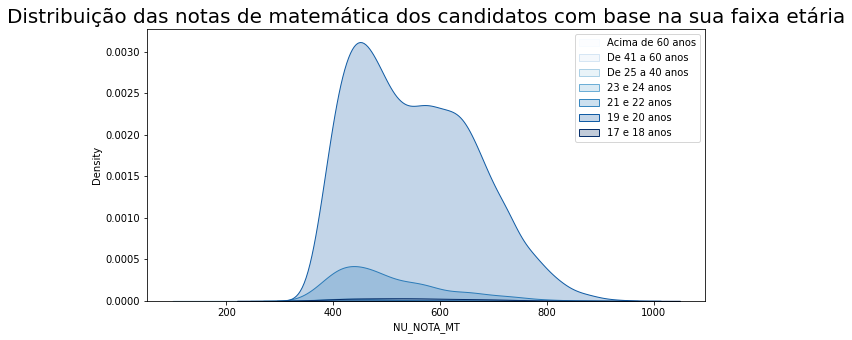

In [ ]:
mean_vs_faixa = ['NU_NOTA_MT', 'subgrupos_faixa_etaria']
sns.kdeplot(data=df[mean_vs_faixa], x='NU_NOTA_MT', fill=True, hue='subgrupos_faixa_etaria', palette="Blues_r")

plt.legend(['Acima de 60 anos', 'De 41 a 60 anos', 'De 25 a 40 anos', '23 e 24 anos', '21 e 22 anos', '19 e 20 anos', '17 e 18 anos', 'Menor de 17'], fontsize = 10)
plt.title('Distribuição das notas de matemática dos candidatos com base na sua faixa etária', fontsize=20)
plt.show()

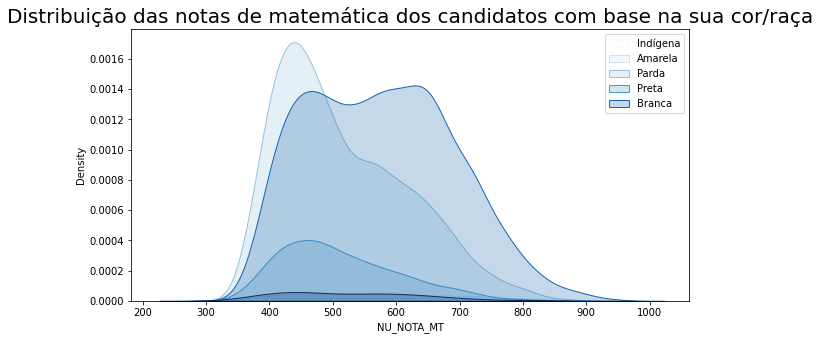

In [ ]:
mean_vs_cor = ['NU_NOTA_MT', 'TP_COR_RACA']
sns.kdeplot(data=df[mean_vs_cor], x='NU_NOTA_MT', fill=True, hue='TP_COR_RACA', palette="Blues_r")

plt.legend(['Indígena', 'Amarela', 'Parda', 'Preta', 'Branca'], fontsize = 10)
plt.title('Distribuição das notas de matemática dos candidatos com base na sua cor/raça', fontsize=20)
plt.show()


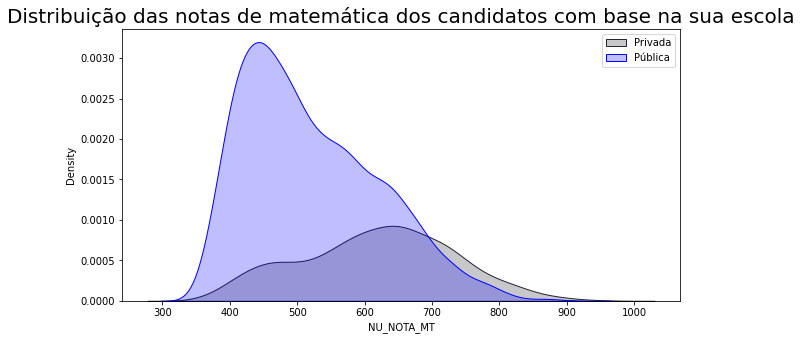

In [ ]:
mean_vs_escola = ['NU_NOTA_MT', 'TP_ESCOLA']
sns.kdeplot(data=df[mean_vs_escola], x='NU_NOTA_MT', fill=True, hue='TP_ESCOLA', palette="dark:b_r")
plt.legend(['Privada', 'Pública'], fontsize = 10)
plt.title('Distribuição das notas de matemática dos candidatos com base na sua escola', fontsize=20)
plt.show()

#### 🏫 A interseção entre renda, raça e desempenho acadêmico no acesso ao ensino superior brasileiro


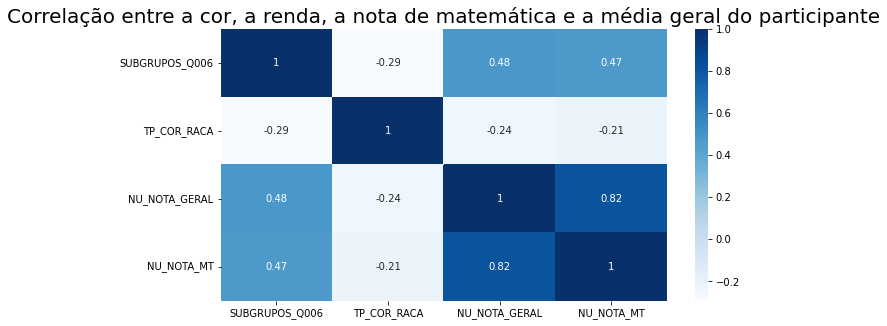

In [ ]:
correlation_df = df[[ 'SUBGRUPOS_Q006','TP_COR_RACA','NU_NOTA_GERAL','NU_NOTA_MT']].corr()
sns.heatmap(correlation_df, annot=True,cmap="Blues")
plt.title('Correlação entre a cor, a renda, a nota de matemática e a média geral do participante', fontsize=20)
plt.show()

In [ ]:
def colorSpecify(x):
  if x is 0:
    return 'Não declarado'
  if x is 1:
    return 'Branca'
  if x is 2:
    return 'Preta'
  if x is 3:
    return 'Parda'
  if x is 4 or x is 5:
    return "Amarela ou Indígena"

In [ ]:
df['Raça'] = df['TP_COR_RACA'].apply(colorSpecify)

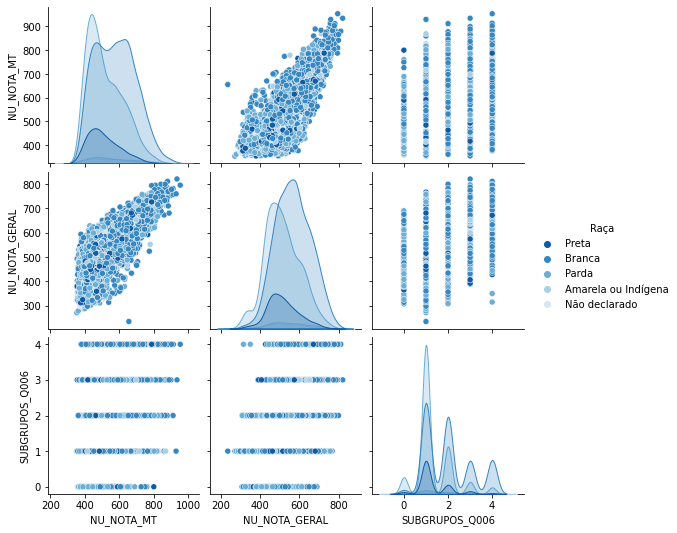

In [ ]:
grades2 = [ 'NU_NOTA_MT', 'NU_NOTA_GERAL', 'SUBGRUPOS_Q006','Raça']
sns.pairplot(df[grades2], hue='Raça', palette='Blues_r')

plt.show()

#### 🌐 Extraindo dados do Geopackage

In [ ]:
ufs_df = gpd.read_file('/content/drive/MyDrive/Projeto EST/bcim_2016_21_11_2018.gpkg', layer='lim_unidade_federacao_a')
ufs_df.head()

,nome,nomeabrev,geometriaaproximada,sigla,geocodigo,id_produtor,id_elementoprodutor,cd_insumo_orgao,nr_insumo_mes,nr_insumo_ano,tx_insumo_documento,geometry
0,Goiás,None,Sim,GO,52,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-50.15876 -12.41581, -50.15743..."
1,Mato Grosso do Sul,None,Sim,MS,50,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-56.09815 -17.17220, -56.09159..."
2,Paraná,None,Sim,PR,41,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-52.08090 -22.52893, -52.04903..."
3,Minas Gerais,None,Sim,MG,31,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-44.21152 -14.22955, -44.20750..."
4,Sergipe,None,Sim,SE,28,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-38.00366 -9.51544, -38.00052 ..."


#### 🗺️ Distribuição da média das notas pelo Brasil

In [ ]:
NOTA_UF = df[['NU_NOTA_GERAL', 'SG_UF_ESC']].copy()
NOTA_UF = NOTA_UF.groupby(by='SG_UF_ESC').mean()
NOTA_UF

ufs_df.rename({'sigla': 'SG_UF_ESC'}, axis=1, inplace=True)
ufs_df

BRASIL = ufs_df.merge(NOTA_UF, on='SG_UF_ESC', how='left')

BRASIL[['SG_UF_ESC', 'NU_NOTA_GERAL', 'geometry']].head()

,SG_UF_ESC,NU_NOTA_GERAL,geometry
0,GO,527.619667,"MULTIPOLYGON (((-50.15876 -12.41581, -50.15743..."
1,MS,538.848049,"MULTIPOLYGON (((-56.09815 -17.17220, -56.09159..."
2,PR,546.464326,"MULTIPOLYGON (((-52.08090 -22.52893, -52.04903..."
3,MG,572.310096,"MULTIPOLYGON (((-44.21152 -14.22955, -44.20750..."
4,SE,534.004068,"MULTIPOLYGON (((-38.00366 -9.51544, -38.00052 ..."


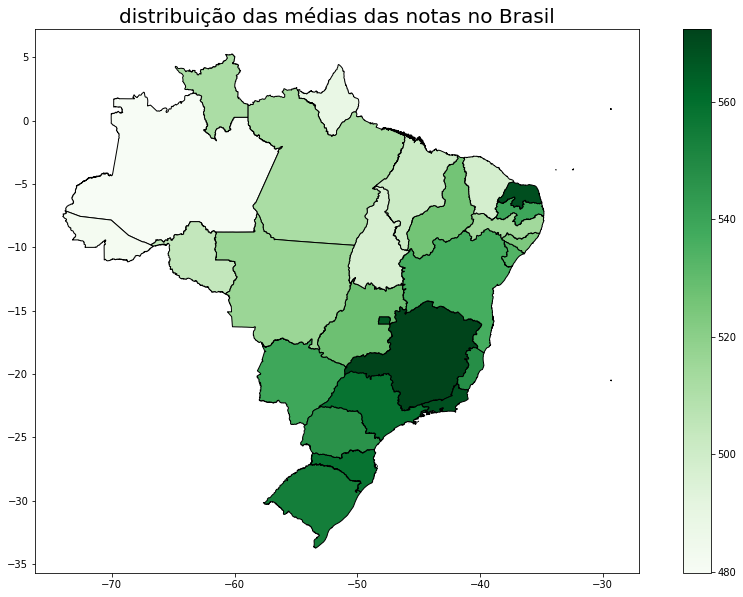

In [ ]:
BRASIL.plot(column='NU_NOTA_GERAL',
          cmap='Greens',
          figsize=(16,10),
          legend=True,
          edgecolor='black')

plt.title('distribuição das médias das notas no Brasil', fontsize=20)
plt.show()

#### 🗺️ Distribuição das notas de matemática pelo Brasil

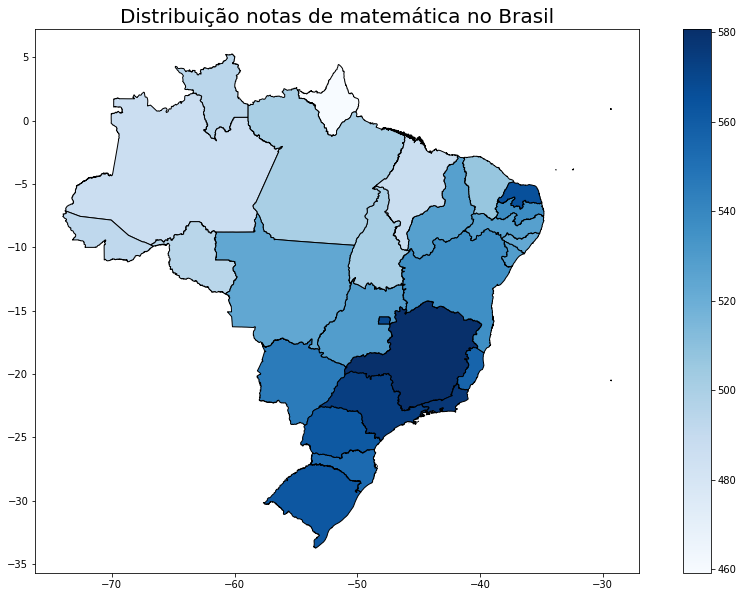

In [ ]:
NOTA_UF = df[['NU_NOTA_MT', 'SG_UF_ESC']].copy()
NOTA_UF = NOTA_UF.groupby(by='SG_UF_ESC').mean()
NOTA_UF

ufs_df.rename({'sigla': 'SG_UF_ESC'}, axis=1, inplace=True)
ufs_df

BRASIL = ufs_df.merge(NOTA_UF, on='SG_UF_ESC', how='left')

BRASIL.plot(column='NU_NOTA_MT',
          cmap='Blues',
          figsize=(16,10),
          legend=True,
          edgecolor='black')

plt.title('Distribuição notas de matemática no Brasil', fontsize=20)
plt.show()